In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [70]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [71]:
print(train_images.shape)
train_images, val_images = train_images[:50000], train_images[50000:]
print(val_images.shape)
print(train_images.shape)
train_images = train_images.reshape((50000, 28, 28, 1)).astype('float32') / 255
val_images = val_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 28, 28, 1)


In [72]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [73]:
train_labels, val_labels = train_labels[:50000], train_labels[50000:]

In [74]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [75]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))


Epoch 1/10
782/782 [==============================] - 8s 9ms/step - loss: 0.8495 - accuracy: 0.7135 - val_loss: 0.3412 - val_accuracy: 0.8960
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2710 - accuracy: 0.9153 - val_loss: 0.1779 - val_accuracy: 0.9474
Epoch 3/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1680 - accuracy: 0.9485 - val_loss: 0.1644 - val_accuracy: 0.9507
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1258 - accuracy: 0.9598 - val_loss: 0.1187 - val_accuracy: 0.9659
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1035 - accuracy: 0.9670 - val_loss: 0.0951 - val_accuracy: 0.9713
Epoch 6/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0891 - accuracy: 0.9718 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0792 - accuracy: 0.9750 - val_loss: 0.0807 - val_accuracy: 0.9755
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 19.9806 - accuracy: 0.9559
Test accuracy: 0.9559000134468079


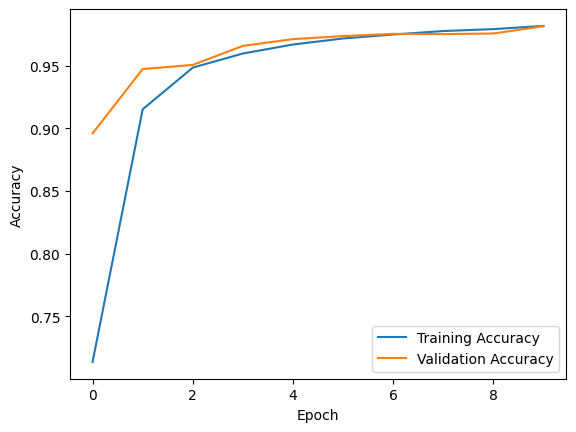

In [77]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Summary

we were able to obtain 0.956 accuracy, which i consider good, although i know some models can obtain up to 99%